##**1. Import Library**

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**2. Load Dataset**

In [ ]:
# load dataset from google drive storage
df = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Student Performance in Exam/clean_dataset.csv')
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,passing_score
0,female,group B,bachelor's degree,standard,none,72,72,74,not_passed
1,female,group C,some college,standard,completed,69,90,88,passed
2,female,group B,master's degree,standard,none,90,95,93,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,not_passed
4,male,group C,some college,standard,none,76,78,75,passed
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,passed
996,male,group C,high school,free/reduced,none,62,55,55,not_passed
997,female,group C,high school,free/reduced,completed,59,71,65,not_passed
998,female,group D,some college,standard,completed,68,78,77,not_passed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   passing_score                1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


##**3. Exploratory Data Analysis (EDA)**

###**a. Statistical Summary**

In [ ]:
# list the columns in the same data type
cat_var = [col for col in df.columns if (df[col].dtype=='O') and (col != 'passing_score')]
num_var = [col for col in df.columns if (df[col].dtype=='int64') | (df[col].dtype=='float64')]
lab_var = ['passing_score']

In [ ]:
# check categorical variable
cat_var

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [ ]:
# check categorical variable
num_var

['math_score', 'reading_score', 'writing_score']

In [ ]:
# check label/target variable
lab_var

['passing_score']

In [ ]:
# check descriptive statistics of categorical variables
df[cat_var].describe().T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental_level_of_education,1000,6,some college,226
lunch,1000,2,standard,645
test_preparation_course,1000,2,none,642


In [ ]:
# check descriptive statistics of categorical variables
df[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


###**b. Univariate Analysis**

####**Gender**

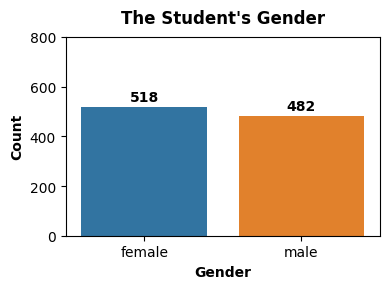

In [ ]:
# visualize each variable (gender) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df, x='gender', order= df['gender'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,800)
ax.set_title("The Student's Gender", weight='bold',pad= 10)
ax.set_xlabel('Gender', weight='bold')
ax.set_ylabel('Count', weight='bold')
plt.tight_layout()
plt.show()

> - Jumlah siswa perempuan (518 orang) **lebih banyak** daripada laki-laki (482 orang)
>


####**Race/Ethnicity**

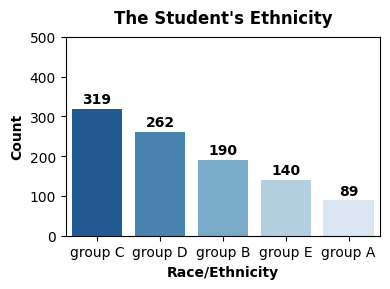

In [ ]:
# # visualize each variable (age) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df, x='race/ethnicity',
                  palette="Blues_r",
                  order=df['race/ethnicity'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,500)
ax.set_title("The Student's Ethnicity", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Race/Ethnicity', weight='bold')
plt.tight_layout()
plt.show()

> - Siswa yang berasal dari ras/etnik yaitu **group C** menjadi yang **terbanyak** jumlahnya daripada ras lain. Sedangkan ras/etnik dari **group A** merupakan yang **paling sedikit** jumlahnya.

####**Parental Level of Education**

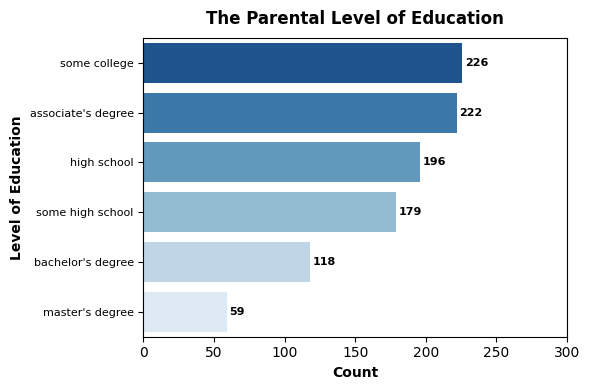

In [ ]:
# visualize each variable (study programs) with sns.countplot() operator
plt.figure(figsize=(6,4))
ax= sns.countplot(data=df, y='parental_level_of_education',
                  palette="Blues_r",
                  order= df['parental_level_of_education'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold',padding=2, fontsize=8)
ax.set_xlim(0,300)
ax.set_title("The Parental Level of Education", weight='bold',pad= 10)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Count', weight='bold')
ax.set_ylabel('Level of Education', weight='bold')
plt.tight_layout()
plt.show()

> - Siswa dengan level pendidikan orangtua yaitu **some college** menjadi yang **paling banyak** jumlahnya. Sedangkan level pendidikan orang yaitu **master's degree** menjadi yang **paling sedikit** jumlahnya.



####**Lunch**

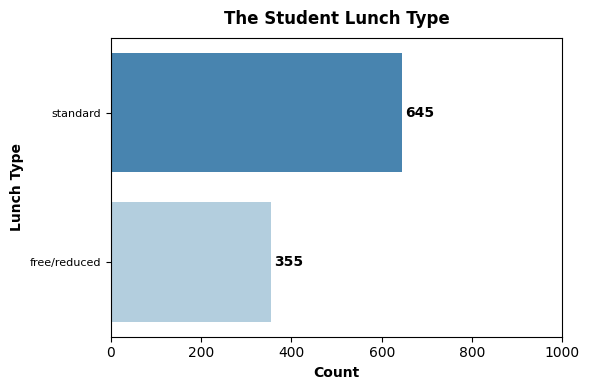

In [ ]:
# visualize each variable (study years) with sns.countplot() operator
plt.figure(figsize=(6,4))
ax= sns.countplot(data=df, y='lunch', palette="Blues_r", order= df['lunch'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold',padding=2)
ax.set_xlim(0,1000)
ax.set_title("The Student Lunch Type", weight='bold',pad= 10)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Count', weight='bold')
ax.set_ylabel('Lunch Type', weight='bold')
plt.tight_layout()
plt.show()

> - Siswa dengan makan siang dari berupa standar menjadi yang **paling banyak**. sedangkan makan siang berupa **free/reduced** menjadi yang paling sedikit jumlahnya.

####**Test Preparation Course**

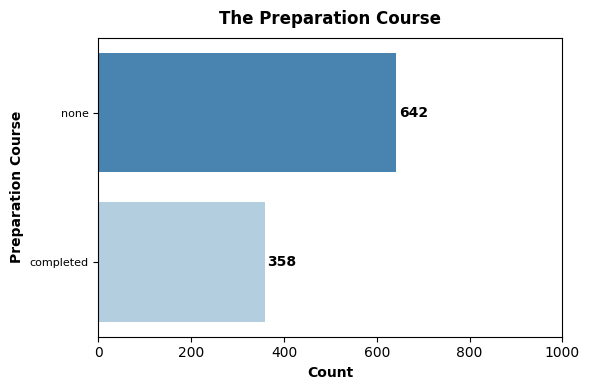

In [ ]:
# visualize each variable (CGPA) with sns.countplot() operator
plt.figure(figsize=(6,4))
ax= sns.countplot(data=df, y='test_preparation_course',
                  palette="Blues_r",
                  order= df['test_preparation_course'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold',padding=2)
ax.set_xlim(0,1000)
ax.set_title("The Preparation Course", weight='bold',pad= 10)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Count', weight='bold')
ax.set_ylabel('Preparation Course', weight='bold')
plt.tight_layout()
plt.show()

> - Siswa yang tidak menyelesaikan test preparation course (none) jumlahnya **lebih banyak** daripada yang menyelesaikan test preparation course (completed).

####**Math, Reading, & Writing Score**

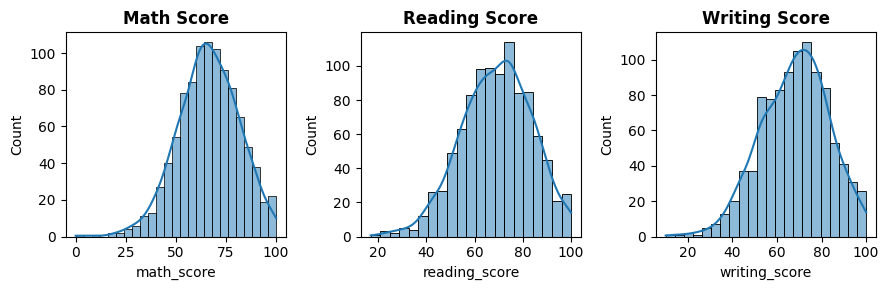

In [ ]:
# visualize each variable (depression, anxiety, panic attack, seeking treatment) with sns.countplot() operator

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].set_title('Math Score', weight='bold')
axes[1].set_title('Reading Score', weight='bold')
axes[2].set_title('Writing Score', weight='bold')

# Plot countplot for depression columns
sns.histplot(data=df, x='math_score', kde=True, ax=axes[0])
# Plot countplot for anxiety columns
sns.histplot(data=df, x='reading_score',kde=True, ax=axes[1])
# Plot countplot for depression columns
sns.histplot(data=df, x='writing_score',kde=True, ax=axes[2])

plt.tight_layout()

# show the plot
plt.show()

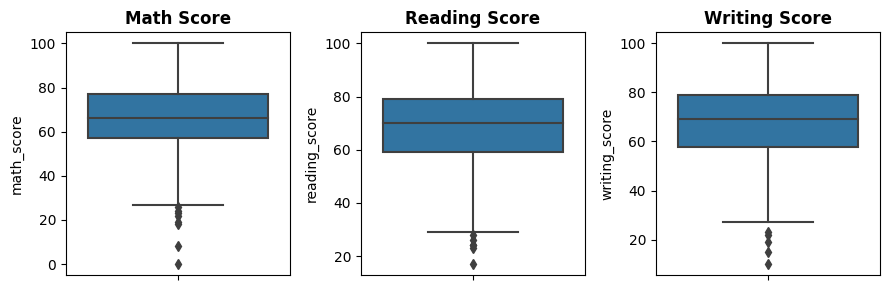

In [ ]:
# visualize each variable (depression, anxiety, panic attack, seeking treatment) with sns.countplot() operator

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].set_title('Math Score', weight='bold')
axes[1].set_title('Reading Score', weight='bold')
axes[2].set_title('Writing Score', weight='bold')

# Plot countplot for depression columns
sns.boxplot(data=df, y='math_score', ax=axes[0])
# Plot countplot for anxiety columns
sns.boxplot(data=df, y='reading_score', ax=axes[1])
# Plot countplot for depression columns
sns.boxplot(data=df, y='writing_score', ax=axes[2])

plt.tight_layout()

# show the plot
plt.show()

In [ ]:
from scipy.stats import skew

def check_skewness(data, column):
    # Menghitung nilai skewness
    skewness = skew(data[column])

    if skewness < 0:
        print("Distribusi memiliki skewness ke kiri (negative skewness)")
    elif skewness > 0:
        print("Distribusi memiliki skewness ke kanan (positif skewness)")
    else:
        print("Distribusi adalah distribusi normal (symmetrical)")

In [ ]:
check_skewness(df, 'math_score')

Distribusi memiliki skewness ke kiri (negative skewness)


In [ ]:
check_skewness(df, 'reading_score')

Distribusi memiliki skewness ke kiri (negative skewness)


In [ ]:
check_skewness(df, 'writing_score')

Distribusi memiliki skewness ke kiri (negative skewness)


> - Terlihat dari boxplot dan histplot bahwa fitur `math_score`, `reading_score`, dan `writing_score` memiliki distribusi yang tidak simetris/tidak normal. Maka dari itu, dapat dikatakan bahwa data berdistribusi secara asimetris yang melebar kesalah satu sisi atau memiliki kecondongan ke arah negatif atau positif dari distribusi rata-rata datanya. Kecondongan kesalah satu arah ini sering disebut dengan Skewness.
> - Dari fitur `math_score`, `reading_score`, dan `writing_score` terlihat dari ketiganya memiliki distribusi bertipe **Negative Skewness**
> - rata-rata nilai dari `math_score` = 66
> - rata-rata nilai dari `reading_score` = 69
> - rata-rata nilai dari `writing_score` = 68
> - Secara umum, dilihat dari rata-rata `math_score`, `reading_score`, dan `writing_score`. siswa belum memenuhi cutoff tes SAT.


####**Passing Score**

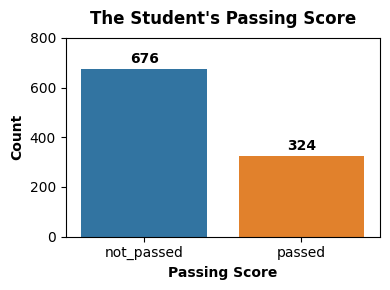

In [ ]:
# visualize each variable (passing score) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df, x='passing_score')
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,800)
ax.set_title("The Student's Passing Score", weight='bold',pad= 10)
ax.set_xlabel('Passing Score', weight='bold')
ax.set_ylabel('Count', weight='bold')
plt.tight_layout()
plt.show()

> - Siswa yang **tidak lulus** tes SAT jumlahnya **lebih banyak** daripada yang lulus tes SAT/mencapai cutoff.

###**c. Deep-Dive Questions**

####**1c. How is the passing score of student?**



#####- How many students who get a passing score are declared passed?

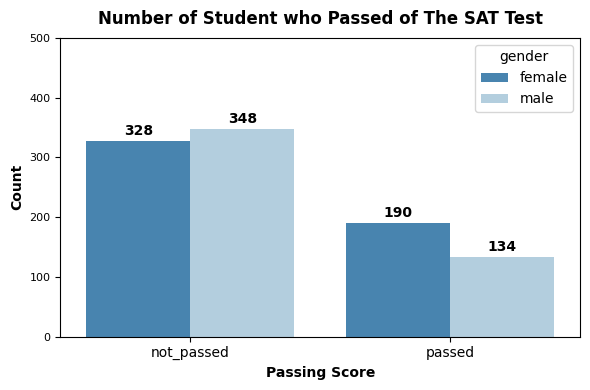

In [ ]:
# visualize each variable (CGPA) with sns.countplot() operator
plt.figure(figsize=(6,4))
ax= sns.countplot(data=df,
                  x='passing_score',
                  hue='gender',
                  palette="Blues_r",
                  order= df['passing_score'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold',padding=2)
ax.set_ylim(0,500)
ax.set_title("Number of Student who Passed of The SAT Test", weight='bold',pad= 10)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Passing Score', weight='bold')
ax.set_ylabel('Count', weight='bold')
plt.tight_layout()
plt.show()

- > - Dari bar plot **siswa yang tidak mencapai cutoff**, terlihat lebih banyak siswa laki-laki yang tidak mencapai cutoff daripada siswa perempuan yang juga tidak mencapai cutoff. Sedangkan dari barplot **siswa yang mencapai cutoff**, terlihat bahwa siswa perempuan yang mencapai cutoff lebih banyak ketimbang siswa laki-laki yang juga mencapai cutoff.

#####- berapa banyak siswa yang mendapat skor matematika diatas cutoff tes SAT?

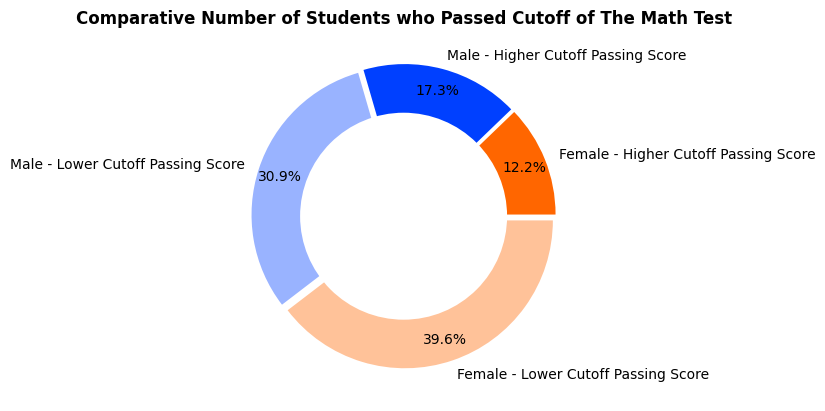

In [ ]:
# # counts the number of students who get a math score greater than equal to the specified cutoff

higher_cutoff_male = df[(df['gender']=='male') & (df['math_score'] >= 75)].shape[0]
higher_cutoff_female = df[(df['gender']=='female') & (df['math_score'] >= 75)].shape[0]
lower_cutoff_male = df[(df['gender']=='male') & (df['math_score'] < 75)].shape[0]
lower_cutoff_female = df[(df['gender']=='female') & (df['math_score'] < 75)].shape[0]

labels = ['Female - Higher Cutoff Passing Score',
          'Male - Higher Cutoff Passing Score',
          'Male - Lower Cutoff Passing Score',
          'Female - Lower Cutoff Passing Score']
sizes = [higher_cutoff_female,
         higher_cutoff_male,
         lower_cutoff_male,
         lower_cutoff_female]
colors = ['#ff6600','#0040ff','#99b3ff','#ffc299']
explode = (0.03, 0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Comparative Number of Students who Passed Cutoff of The Math Test', weight='bold')

# Displaying Chart
plt.show()

> - Dari donut chart, terlihat bahwa persentase berdasarkan siswa yang lulus, **siswa laki-laki (17,3%) lebih banyak** jumlahnya daripada siswa perempuan (12,2%) yang juga lulus cutoff tes matematika.

#####- berapa banyak siswa yang mendapat skor membaca diatas cutoff tes SAT?

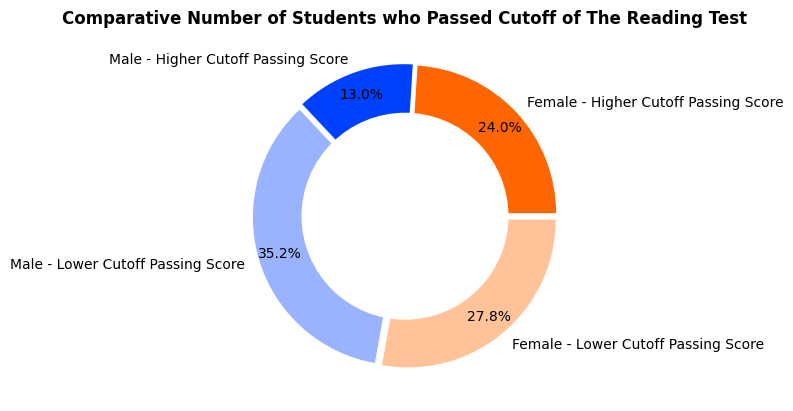

In [ ]:
# # counts the number of students who get a reading score greater than equal to the specified cutoff

higher_cutoff_male = df[(df['gender']=='male') & (df['reading_score'] >= 75)].shape[0]
higher_cutoff_female = df[(df['gender']=='female') & (df['reading_score'] >= 75)].shape[0]
lower_cutoff_male = df[(df['gender']=='male') & (df['reading_score'] < 75)].shape[0]
lower_cutoff_female = df[(df['gender']=='female') & (df['reading_score'] < 75)].shape[0]

labels = ['Female - Higher Cutoff Passing Score',
          'Male - Higher Cutoff Passing Score',
          'Male - Lower Cutoff Passing Score',
          'Female - Lower Cutoff Passing Score']
sizes = [higher_cutoff_female,
         higher_cutoff_male,
         lower_cutoff_male,
         lower_cutoff_female]
colors = ['#ff6600','#0040ff','#99b3ff','#ffc299']
explode = (0.03, 0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Comparative Number of Students who Passed Cutoff of The Reading Test', weight='bold')

# Displaying Chart
plt.show()

> - Dari donut chart, terlihat bahwa berdasarkan persentase siswa yang lulus, **siswa perempuan (24,0%) lebih banyak** jumlahnya daripada siswa laki-laki (13,0%) yang juga lulus cutoff tes membaca.

#####- berapa banyak siswa yang mendapat skor menulis diatas cutoff tes SAT?

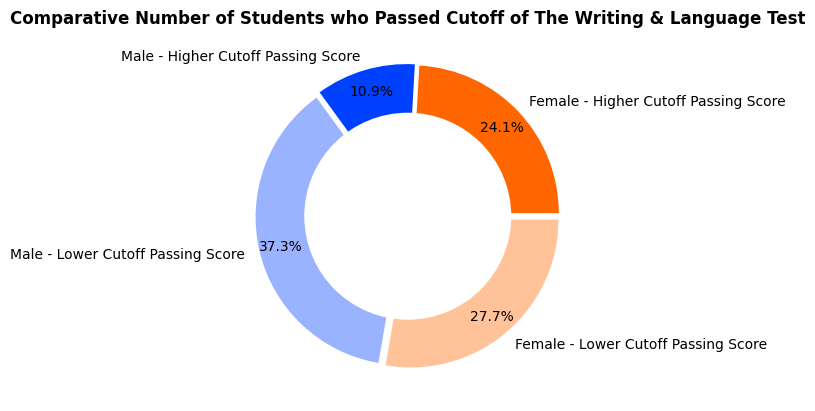

In [ ]:
# # counts the number of students who get a writing score greater than equal to the specified cutoff

higher_cutoff_male = df[(df['gender']=='male') & (df['writing_score'] >= 75)].shape[0]
higher_cutoff_female = df[(df['gender']=='female') & (df['writing_score'] >= 75)].shape[0]
lower_cutoff_male = df[(df['gender']=='male') & (df['writing_score'] < 75)].shape[0]
lower_cutoff_female = df[(df['gender']=='female') & (df['writing_score'] < 75)].shape[0]

labels = ['Female - Higher Cutoff Passing Score',
          'Male - Higher Cutoff Passing Score',
          'Male - Lower Cutoff Passing Score',
          'Female - Lower Cutoff Passing Score']
sizes = [higher_cutoff_female,
         higher_cutoff_male,
         lower_cutoff_male,
         lower_cutoff_female]
colors = ['#ff6600','#0040ff','#99b3ff','#ffc299']
explode = (0.03, 0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Comparative Number of Students who Passed Cutoff of The Writing & Language Test', weight='bold')

# Displaying Chart
plt.show()

> - Dari donut chart, terlihat bahwa berdasarkan persentase siswa yang lulus, **siswa perempuan (24,1%) lebih banyak** jumlahnya daripada siswa laki-laki (10,9%) yang juga lulus cutoff tes membaca.

> - Dari hasil ketiga donut chart (math, reading, dan writing test) diatas, terlihat bahwa **siswa laki-laki lebih banyak yang lulus** daripada siswa perempuan yang juga lulus dari **tes matematika**. sedangkan pada **tes membaca dan menulis**, **siswa perempuan lebih banyak yang lulus** daripada siswa laki-laki yang juga lulus.

####**2c. How about Test Preparation Course of Student?**



#####**siswa dengan test preparation course apa yang memiliki persentase kelulusan terbesar?**

In [ ]:
gndr_tpc = df.groupby(['test_preparation_course','gender','passing_score']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['test_preparation_course'], columns=['gender','passing_score'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc = gndr_tpc.sort_values(by=['total_students'], ascending=False)
gndr_tpc.columns = gndr_tpc.columns.map(lambda x: '_'.join(map(str, x)))
gndr_tpc = gndr_tpc.reset_index()
gndr_tpc

,test_preparation_course,female_not_passed,female_passed,male_not_passed,male_passed,total_students_
0,none,234,100,245,63,642
1,completed,94,90,103,71,358


In [ ]:
gndr_tpc = df[df['passing_score']=='passed'].groupby(['test_preparation_course','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['test_preparation_course'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['test_preparation_course'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,female,male,total_students,pct
test_preparation_course,,,,
completed,90,71,161,45.0
none,100,63,163,25.0


> - Dilihat persentase kelulusan berdasarkan `test_preparation_course`, menunjukkan bahwa siswa yang menyelesaikan **test preparation course (completed)** = 45%, memiliki persentase **lebih besar** kelulusannya daripada siswa yang tidak menyelesaikan test preparation course (none) = 25%.

####**3c. How about Parental Level Education of Student?**



#####**siswa dengan level pendidikan orangtua apa yang memiliki persentase kelulusan terbesar?**

In [ ]:
gndr_ple = df.groupby(['parental_level_of_education','gender','passing_score']).size().reset_index(name='total_students')
gndr_ple = gndr_ple.pivot_table(index=['parental_level_of_education'], columns=['gender','passing_score'], values='total_students', fill_value=0)
gndr_ple['total_students'] = gndr_ple.sum(axis=1)
gndr_ple = gndr_ple.sort_values(by=['total_students'], ascending=False)
gndr_ple.columns = gndr_ple.columns.map(lambda x: '_'.join(map(str, x)))
gndr_ple = gndr_ple.reset_index()
gndr_ple

,parental_level_of_education,female_not_passed,female_passed,male_not_passed,male_passed,total_students_
0,some college,74,44,78,30,226
1,associate's degree,69,47,68,38,222
2,high school,72,22,87,15,196
3,some high school,61,30,66,22,179
4,bachelor's degree,33,30,38,17,118
5,master's degree,19,17,11,12,59


In [ ]:
gndr_ple = df[df['passing_score']=='passed'].groupby(['parental_level_of_education','gender']).size().reset_index(name='total_students')
gndr_ple = gndr_ple.pivot_table(index=['parental_level_of_education'], columns=['gender'], values='total_students', fill_value=0)
gndr_ple['total_students'] = gndr_ple.sum(axis=1)
gndr_ple['pct'] = round(gndr_ple['total_students'] / df['parental_level_of_education'].value_counts() * 100,0)
gndr_ple = gndr_ple.sort_values(by=['pct'], ascending=False)
gndr_ple

gender,female,male,total_students,pct
parental_level_of_education,,,,
master's degree,17,12,29,49.0
bachelor's degree,30,17,47,40.0
associate's degree,47,38,85,38.0
some college,44,30,74,33.0
some high school,30,22,52,29.0
high school,22,15,37,19.0


> - Dilihat persentase kelulusan berdasarkan `parental_level_of_education`, menunjukkan bahwa siswa yang orangtuanya memiliki jenjang pendidikan (magister) **master's degree** = 49%, memiliki persentase **lebih tinggi** kelulusannya daripada jenjang pendidikan lainnya.
> - Jika diamati lebih lanjut, persentase kelulusan semakin besar jumlahnya apabila semakin tinggi pula jenjang pendidikannya.
> - Siswa dengan level pendidikan orangtuanya berupa **high school** memiliki persentase kelulusan **paling rendah** = 19%.

#####**siswa dengan level pendidikan orangtua apa yang memiliki persentase sudah menyelesaikan test preparation course?**

In [ ]:
gndr_lnc = df[df['test_preparation_course']=='completed'].groupby(['parental_level_of_education','test_preparation_course']).size().reset_index(name='total_students')
gndr_lnc = gndr_lnc.pivot_table(index=['parental_level_of_education'], columns=['test_preparation_course'], values='total_students', fill_value=0)
gndr_lnc['total_students'] = gndr_lnc.sum(axis=1)
gndr_lnc['pct'] = round(gndr_lnc['total_students'] / df['parental_level_of_education'].value_counts() * 100,0)
gndr_lnc = gndr_lnc.sort_values(by=['pct'], ascending=False)
gndr_lnc

test_preparation_course,completed,total_students,pct
parental_level_of_education,,,
some high school,77,77,43.0
bachelor's degree,46,46,39.0
associate's degree,82,82,37.0
master's degree,20,20,34.0
some college,77,77,34.0
high school,56,56,29.0


> - Siswa yang level pendidikan orangtuanya yakni **some high school** memiliki persentase menyelesaikan test preparation course terbanyak = 43% daripada siswa dengan level pendidikan orangtua lainnya.

####**4c. How about Race/Ethnicity of Student?**



#####**siswa dari ras/etnik apa yang memiliki persentase kelulusan terbesar?**

In [ ]:
gndr_rc = df.groupby(['race/ethnicity','gender','passing_score']).size().reset_index(name='total_students')
gndr_rc = gndr_rc.pivot_table(index=['race/ethnicity'], columns=['gender','passing_score'], values='total_students', fill_value=0)
gndr_rc['total_students'] = gndr_rc.sum(axis=1)
gndr_rc = gndr_rc.sort_values(by=['total_students'], ascending=False)
gndr_rc.columns = gndr_rc.columns.map(lambda x: '_'.join(map(str, x)))
gndr_rc = gndr_rc.reset_index()
gndr_rc

,race/ethnicity,female_not_passed,female_passed,male_not_passed,male_passed,total_students_
0,group C,120,60,105,34,319
1,group D,79,50,94,39,262
2,group B,67,37,67,19,190
3,group E,36,33,38,33,140
4,group A,26,10,44,9,89


In [ ]:
gndr_rc = df[df['passing_score']=='passed'].groupby(['race/ethnicity','gender']).size().reset_index(name='total_students')
gndr_rc = gndr_rc.pivot_table(index=['race/ethnicity'], columns=['gender'], values='total_students', fill_value=0)
gndr_rc['total_students'] = gndr_rc.sum(axis=1)
gndr_rc['pct'] = round(gndr_rc['total_students'] / df['race/ethnicity'].value_counts() * 100,0)
gndr_rc = gndr_rc.sort_values(by=['pct'], ascending=False)
gndr_rc

gender,female,male,total_students,pct
race/ethnicity,,,,
group E,33,33,66,47.0
group D,50,39,89,34.0
group B,37,19,56,29.0
group C,60,34,94,29.0
group A,10,9,19,21.0


> - Siswa yang berasal dari ras/etnik, yakni **group E** memiliki persentase kelulusan **paling tinggi** = 47%, daripada group lainnya. Sedangkan siswa yang berasal dari ras/etnik **group A** memiliki persentase kelulusan **paling rendah** = 21%.

#####**siswa dari ras/etnik apa yang memiliki persentase kelulusan terbesar berdasarkan tes matematika, membaca, atau menulis?**

In [ ]:
gndr_mth = df[df['math_score']>= 75].groupby(['race/ethnicity','gender']).size().reset_index(name='total_students')
gndr_mth = gndr_mth.pivot_table(index=['race/ethnicity'], columns=['gender'], values='total_students', fill_value=0)
gndr_mth['total_students'] = gndr_mth.sum(axis=1)
gndr_mth['pct'] = round(gndr_mth['total_students'] / df['race/ethnicity'].value_counts() * 100,0)
gndr_mth = gndr_mth.sort_values(by=['pct'], ascending=False)
gndr_mth

gender,female,male,total_students,pct
race/ethnicity,,,,
group E,27,43,70,50.0
group D,34,52,86,33.0
group C,34,43,77,24.0
group B,21,23,44,23.0
group A,6,12,18,20.0


In [ ]:
gndr_rd = df[df['reading_score']>= 75].groupby(['race/ethnicity','gender']).size().reset_index(name='total_students')
gndr_rd = gndr_rd.pivot_table(index=['race/ethnicity'], columns=['gender'], values='total_students', fill_value=0)
gndr_rd['total_students'] = gndr_rd.sum(axis=1)
gndr_rd['pct'] = round(gndr_rd['total_students'] / df['race/ethnicity'].value_counts() * 100,0)
gndr_rd = gndr_rd.sort_values(by=['pct'], ascending=False)
gndr_rd

gender,female,male,total_students,pct
race/ethnicity,,,,
group E,39,27,66,47.0
group C,82,37,119,37.0
group D,62,35,97,37.0
group B,45,22,67,35.0
group A,12,9,21,24.0


In [ ]:
gndr_wr = df[df['writing_score']>= 75].groupby(['race/ethnicity','gender']).size().reset_index(name='total_students')
gndr_wr= gndr_wr.pivot_table(index=['race/ethnicity'], columns=['gender'], values='total_students', fill_value=0)
gndr_wr['total_students'] = gndr_wr.sum(axis=1)
gndr_wr['pct'] = round(gndr_wr['total_students'] / df['race/ethnicity'].value_counts() * 100,0)
gndr_wr = gndr_wr.sort_values(by=['pct'], ascending=False)
gndr_wr

gender,female,male,total_students,pct
race/ethnicity,,,,
group E,38,23,61,44.0
group D,68,35,103,39.0
group C,81,27,108,34.0
group B,42,17,59,31.0
group A,12,7,19,21.0


> - Siswa yang berasal dari ras/etnik **group E** memiliki persentase kelulusan **paling tinggi**, baik itu dari tes matematika (50%), membaca (47%), dan menulis (44%) ketimbang siswa dari group lainnya.
> - Siswa yang berasal dari ras/etnik **group A** memiliki persentase kelulusan **paling rendah**, baik itu dari tes matematika, membaca, dan menulis.

#####**siswa dari ras/etnik apa yang telah menyelesaikan test preparation course dengan persentase terbesar?**

In [ ]:
gndr_wr = df[(df['test_preparation_course']=='completed')].groupby(['race/ethnicity','gender']).size().reset_index(name='total_students')
gndr_wr= gndr_wr.pivot_table(index=['race/ethnicity'], columns=['gender'], values='total_students', fill_value=0)
gndr_wr['total_students'] = gndr_wr.sum(axis=1)
gndr_wr['pct'] = round(gndr_wr['total_students'] / df['race/ethnicity'].value_counts() * 100,0)
gndr_wr = gndr_wr.sort_values(by=['pct'], ascending=False)
gndr_wr

gender,female,male,total_students,pct
race/ethnicity,,,,
group E,24,36,60,43.0
group C,69,48,117,37.0
group B,35,33,68,36.0
group A,12,19,31,35.0
group D,44,38,82,31.0


> - Siswa yang berasal dari ras/etnik **group E** memiliki persentase menyelesaikan test preparation course **paling tinggi** = 43%, daripada siswa dari group lainnya.

#####**siswa dari ras/etnik apa yang sudah menyelesaikan test preparation course dan memiliki persentase kelulusan terbesar dari tes SAT?**

In [ ]:
gndr_wr = df[(df['test_preparation_course']=='completed') & (df['passing_score']=='passed')].groupby(['race/ethnicity','gender','passing_score']).size().reset_index(name='total_students')
gndr_wr= gndr_wr.pivot_table(index=['race/ethnicity'], columns=['gender'], values='total_students', fill_value=0)
gndr_wr['total_students'] = gndr_wr.sum(axis=1)
gndr_wr['pct'] = round(gndr_wr['total_students'] / df['race/ethnicity'].value_counts() * 100,0)
gndr_wr = gndr_wr.sort_values(by=['pct'], ascending=False)
gndr_wr

gender,female,male,total_students,pct
race/ethnicity,,,,
group E,15,20,35,25.0
group C,33,17,50,16.0
group B,14,13,27,14.0
group D,22,15,37,14.0
group A,6,6,12,13.0


> - Siswa dari ras/etnik **group E** yang telah menyelesaikan test preparation course (completed), memiliki persentase kelulusan **paling tinggi** = 25%, daripada siswa dari group lainnya.

#####**siswa dengan ras/etnik apa yang belum menyelesaikan test preparation course dan memiliki persentase kelulusan terbesar dari tes SAT?**

In [ ]:
gndr_wr = df[(df['test_preparation_course']=='none') & (df['passing_score']=='passed') ].groupby(['race/ethnicity','gender']).size().reset_index(name='total_students')
gndr_wr= gndr_wr.pivot_table(index=['race/ethnicity'], columns=['gender'], values='total_students', fill_value=0)
gndr_wr['total_students'] = gndr_wr.sum(axis=1)
gndr_wr['pct'] = round(gndr_wr['total_students'] / df['race/ethnicity'].value_counts() * 100,0)
gndr_wr = gndr_wr.sort_values(by=['pct'], ascending=False)
gndr_wr

gender,female,male,total_students,pct
race/ethnicity,,,,
group E,18,13,31,22.0
group D,28,24,52,20.0
group B,23,6,29,15.0
group C,27,17,44,14.0
group A,4,3,7,8.0


#####**siswa dengan ras/etnik apa yang sudah menyelesaikan test preparation course dan memiliki persentase tidak lulus terbesar dari tes SAT?**

In [ ]:
gndr_wr = df[(df['test_preparation_course']=='completed') & (df['passing_score']=='not_passed')].groupby(['race/ethnicity','gender','passing_score']).size().reset_index(name='total_students')
gndr_wr= gndr_wr.pivot_table(index=['race/ethnicity'], columns=['gender'], values='total_students', fill_value=0)
gndr_wr['total_students'] = gndr_wr.sum(axis=1)
gndr_wr['pct'] = round(gndr_wr['total_students'] / df['race/ethnicity'].value_counts() * 100,0)
gndr_wr = gndr_wr.sort_values(by=['pct'], ascending=False)
gndr_wr

gender,female,male,total_students,pct
race/ethnicity,,,,
group B,21,20,41,22.0
group A,6,13,19,21.0
group C,36,31,67,21.0
group E,9,16,25,18.0
group D,22,23,45,17.0


#####**siswa dengan ras/etnik apa yang belum menyelesaikan test preparation course dan memiliki persentase tidak lulus terbesar dari tes SAT?**

In [ ]:
gndr_wr = df[(df['test_preparation_course']=='none') & (df['passing_score']=='not_passed')].groupby(['race/ethnicity','gender','passing_score']).size().reset_index(name='total_students')
gndr_wr= gndr_wr.pivot_table(index=['race/ethnicity'], columns=['gender'], values='total_students', fill_value=0)
gndr_wr['total_students'] = gndr_wr.sum(axis=1)
gndr_wr['pct'] = round(gndr_wr['total_students'] / df['race/ethnicity'].value_counts()*100,0)
gndr_wr = gndr_wr.sort_values(by=['pct'], ascending=False)
gndr_wr

gender,female,male,total_students,pct
race/ethnicity,,,,
group A,20,31,51,57.0
group C,84,74,158,50.0
group B,46,47,93,49.0
group D,57,71,128,49.0
group E,27,22,49,35.0


#####**level pendidikan orangtua dari siswa berdasarkan ras/etnik**

In [ ]:
gndr_wr = df.groupby(['race/ethnicity','parental_level_of_education']).size().reset_index(name='total_students')
gndr_wr= gndr_wr.pivot_table(index=['race/ethnicity'], columns=['parental_level_of_education'], values='total_students', fill_value=0)
gndr_wr['total_students'] = gndr_wr.sum(axis=1)
gndr_wr

parental_level_of_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,total_students
race/ethnicity,,,,,,,
group A,14,12,18,3,18,24,89
group B,41,20,48,6,37,38,190
group C,78,40,64,19,69,49,319
group D,50,28,44,23,67,50,262
group E,39,18,22,8,35,18,140


#####**makan siang siswa berdasarkan ras/etnik**

In [ ]:
gndr_lnc = df[df['lunch']=='free/reduced'].groupby(['lunch','race/ethnicity','gender']).size().reset_index(name='total_students')
gndr_lnc = gndr_lnc.pivot_table(index=['race/ethnicity'], columns=['lunch', 'gender'], values='total_students', fill_value=0)
gndr_lnc['total_students'] = gndr_lnc.sum(axis=1)
gndr_lnc['pct'] = round(gndr_lnc['total_students'] / df['race/ethnicity'].value_counts() * 100,0)
gndr_lnc = gndr_lnc.sort_values(by=['pct'], ascending=False)
gndr_lnc

lunch          free/reduced      total_students   pct
gender               female male                     
race/ethnicity                                       
group A                  14   22             36  40.0
group B                  39   30             69  36.0
group C                  62   52            114  36.0
group D                  51   44             95  36.0
group E                  23   18             41  29.0

In [ ]:
gndr_lnc = df[df['lunch']=='standard'].groupby(['lunch','race/ethnicity','gender']).size().reset_index(name='total_students')
gndr_lnc = gndr_lnc.pivot_table(index=['race/ethnicity'], columns=['lunch','gender'], values='total_students', fill_value=0)
gndr_lnc['total_students'] = gndr_lnc.sum(axis=1)
gndr_lnc['pct'] = round(gndr_lnc['total_students'] / df['race/ethnicity'].value_counts() * 100,0)
gndr_lnc = gndr_lnc.sort_values(by=['pct'], ascending=False)
gndr_lnc

lunch          standard      total_students   pct
gender           female male                     
race/ethnicity                                   
group E              46   53             99  71.0
group B              65   56            121  64.0
group C             118   87            205  64.0
group D              78   89            167  64.0
group A              22   31             53  60.0

####**5c. How about Lunch of Student?**



#####**siswa dengan jenis makan siang apa yang memiliki persentase kelulusan terbesar?**

In [ ]:
gndr_lnc = df.groupby(['lunch', 'gender', 'passing_score']).size().reset_index(name='total_students')
gndr_lnc = gndr_lnc.pivot_table(index='lunch', columns=['gender', 'passing_score'], values='total_students', fill_value=0)
gndr_lnc['total_students'] = gndr_lnc.sum(axis=1)
gndr_lnc = gndr_lnc.sort_values(by='total_students', ascending=False)
gndr_lnc.columns = gndr_lnc.columns.map(lambda x: '_'.join(map(str, x)))
gndr_lnc = gndr_lnc.reset_index()
gndr_lnc


,lunch,female_not_passed,female_passed,male_not_passed,male_passed,total_students_
0,standard,185,144,211,105,645
1,free/reduced,143,46,137,29,355


In [ ]:
gndr_lnc = df[df['passing_score']=='passed'].groupby(['lunch','gender']).size().reset_index(name='total_students')
gndr_lnc = gndr_lnc.pivot_table(index=['lunch'], columns=['gender'], values='total_students', fill_value=0)
gndr_lnc['total_students'] = gndr_lnc.sum(axis=1)
gndr_lnc['pct'] = round(gndr_lnc['total_students'] / df['lunch'].value_counts() * 100,0)
gndr_lnc = gndr_lnc.sort_values(by=['pct'], ascending=False)
gndr_lnc

gender,female,male,total_students,pct
lunch,,,,
standard,144,105,249,39.0
free/reduced,46,29,75,21.0


> - Siswa dengan jenis makan siang **standard**, memiliki persentase kelulusan **paling tinggi** = 39%, daripada siswa dengan jenis makan siang **free/reduced**.

####**6c. How about Perfect Score of Student?**



In [ ]:
df[(df['math_score']==100) & (df['reading_score']==100) & (df['writing_score']==100)]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,passing_score
458,female,group E,bachelor's degree,standard,none,100,100,100,passed
916,male,group E,bachelor's degree,standard,completed,100,100,100,passed
962,female,group E,associate's degree,standard,none,100,100,100,passed


> - Terdapat 3 Siswa dari ras/etnik **group E** yang memiliki skor sempurna (100) dari serangkaian tes SAT (matematika, membaca, dan menulis)

##**4. Hypothesis Testing**

In [ ]:
# create function for hypothesis testing
def hypothesis_testing_contingency_table(df, column1, column2):
    # Create contingency table
    table = pd.crosstab(df[column1], df[column2])

    # Check expected frequency from contingency table
    chi2, p_value, dof, expected = chi2_contingency(table)
    expected_frequency = chi2_contingency(table).expected_freq

    # Check if else operator to execute hypothesis testing prompt
    if (expected_frequency < 5.00).any():
        print('-' * 40)
        print("Menggunakan uji Fisher's exact test")
        print('-' * 40)
        # Perform Fisher's exact test
        stats = importr('stats')
        contingency_table = table.values
        res = stats.fisher_test(contingency_table)
        print('p-value: {}'.format(res[0][0]))

        # Decision and Assumption
        if res[0][0] > 0.05:
            print('Keputusan Hipotesis: Menerima H0, Menolak H1')
            print('Asumsi diterima: {} Tidak Berpengaruh Terhadap {}'.format(column1, column2))
        else:
            print('Keputusan Hipotesis: Menolak H0, Menerima H1')
            print('Asumsi diterima: {} Berpengaruh Terhadap {}'.format(column1, column2))

    elif (expected_frequency >= 5.00).any():
        print('----------')
        print("Menggunakan uji chi-square independen")
        print('----------')
        # Perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(table)
        p_value = chi2_contingency(table).pvalue
        print('P-Value:', p_value)

        # Decision and Assumption
        if chi2_contingency(table).pvalue > 0.05:
            print('Keputusan Hipotesis: Menerima H0, Menolak H1')
            print('Asumsi diterima: {} Tidak Berpengaruh Terhadap {}'.format(column1, column2))
        else:
            print('Keputusan Hipotesis: Menolak H0, Menerima H1')
            print('Asumsi diterima: {} Berpengaruh Terhadap {}'.format(column1, column2))

####**Apakah ras/ethnicity berpengaruh terhadap passing score?**



In [ ]:
hypothesis_testing_contingency_table(df,'race/ethnicity','passing_score')

----------
Menggunakan uji chi-square independen
----------
P-Value: 0.00029616355953919596
Keputusan Hipotesis: Menolak H0, Menerima H1
Asumsi diterima: race/ethnicity Berpengaruh Terhadap passing_score


####**Apakah parental level of education berpengaruh terhadap passing score?**



In [ ]:
hypothesis_testing_contingency_table(df,'parental_level_of_education','passing_score')

----------
Menggunakan uji chi-square independen
----------
P-Value: 8.019434965170246e-06
Keputusan Hipotesis: Menolak H0, Menerima H1
Asumsi diterima: parental_level_of_education Berpengaruh Terhadap passing_score


####**Apakah lunch berpengaruh terhadap passing score?**



In [ ]:
hypothesis_testing_contingency_table(df,'lunch','passing_score')

----------
Menggunakan uji chi-square independen
----------
P-Value: 2.3975841156820135e-08
Keputusan Hipotesis: Menolak H0, Menerima H1
Asumsi diterima: lunch Berpengaruh Terhadap passing_score


####**Apakah test preparation course berpengaruh terhadap passing score?**



In [ ]:
hypothesis_testing_contingency_table(df,'test_preparation_course','passing_score')

----------
Menggunakan uji chi-square independen
----------
P-Value: 3.5389696619483273e-10
Keputusan Hipotesis: Menolak H0, Menerima H1
Asumsi diterima: test_preparation_course Berpengaruh Terhadap passing_score


####**Apakah parental level of education berpengaruh terhadap test preparation course?**



In [ ]:
hypothesis_testing_contingency_table(df,'parental_level_of_education','test_preparation_course')

----------
Menggunakan uji chi-square independen
----------
P-Value: 0.08923388625809343
Keputusan Hipotesis: Menerima H0, Menolak H1
Asumsi diterima: parental_level_of_education Tidak Berpengaruh Terhadap test_preparation_course


##**5. Conclusion**

Demografi Data Mahasiswa:

- Berdasarkan data yang dianalisis, siswa berjenis kelamin (518 orang) lebih banyak jumlahnya daripada laki-laki (482 orang).

- Siswa yang berasal dari race/ethnicity group C menjadi yang mayoritas (319 orang), sedangkan siswa dari group A merupakan ras/etnik yang minoritas (89 orang).

- Level pendidikan orangtua dari siswa kebanyakan berada pada jenjang some college (226 orang) dan disusul oleh associate's degree (222 orang), sedangkan siswa dengan level pendidikan orangtua berupa master's degree menjadi yang paling sedikit (59 orang).

- Kebanyakan siswa mendapatkan makan siang standard (645 orang) dan sisanya makan siang free/reduced (355 orang).

- Mayoritas siswa belum menyelesaikan test preparation course (642 orang) dan sisanya sudah menyelesaikan test preparation course (358 orang).


Analisa Skor Tes SAT:

- Berdasarkan analisa, terlihat bahwa siswa yang tidak mencapai cutoff tes SAT (676 orang) lebih banyak ketimbang yang mencapai cutoff tes SAT (324 orang) yang telah ditentukan. Lebih spesifik lagi, siswa laki-laki yang tidak mencapai cutoff  (348 orang) lebih banyak daripada siswa perempuan yang juga tidak mencapai cutoff (328 orang). Sedangkan siswa perempuan yang mencapai cutoff (190 orang) lebih banyak daripada siswa laki-laki yang juga mencapai cutoff (134 orang).

- Dari analisa, persentase kelulusan pada tes matematika, lebih banyak siswa laki-laki ketimbang perempuan, akan tetapi dari tes membaca dan menulis lebih banyak siswa perempuan ketimbang siswa laki-laki.

- Berdasarkan analisa data dari fitur `test_preparation_course` dan `passing_score`, siswa yang menyelesaikan `test_preparation_course = compeleted` lebih besar persentasenya (45%) yang mencapai cutoff daripada siswa yang tidak menyelesaikan `test_preparation_course = none` (25%). Selanjutnya dilakukan uji signifikansi menggunakan uji chi-squared independen test. Dari hasil tes menunjukkan bahwa p-value < alpha (0.05), yang berarti kemungkinan kecil menolak H1. Maka dari itu, artinya test preparation course berpengaruh terhadap passing score. Dapat dinyatakan bahwa apabila siswa menyelesaikan test preparation course, secara probabilitas juga akan semakin meninggi pula untuk mencapai cutoff.

- Berdasarkan analisa data dari fitur `parental_level_of_education` dan `passing_score`, menunjukkan bahwa apabila level pendidikan orangtua siswa semakin tinggi, maka persentase siswa yang lulus/mencapai cutoff juga semakin besar persentasenya. Hal ini ditunjukan dari data, bahwa siswa yang level pendidikan orangtuanya yaitu master's degree, memiliki persentase tertinggi (49%) dalam mencapai cutoff tes SAT. sedangkan siswa yang level pendidikan orangtuanya yaitu high school memiliki persentase terendah (19%) dalam mencapai cutoff tes SAT. Untuk menguatkan analisa, dilakukan uji signifikansi untuk menjawab hipotesis dengan menggunakan uji chi-squared independen test. hasil pengujian menunjukkan p-value < alpha (0.05), yang dapat dinyatakan bahwa kemungkinan menolak H1 kecil. yang artinya memang `parental_level_of_education` berpengaruh terhadap `passing_score`. Maka dapat dikatakan bahwa semakin tinggi level pendidikan orangtua, maka probabilitas untuk mencapai cutoff juga semakin tinggi.

- Walaupun siswa memiliki orangtua dengan level pendidikan yang tinggi, belum tentu mampu mendorong mereka agar mau menyelesaikan `test_preparation_course`. Justru siswa yang paling banyak menyelesaikan `test_preparation_course` ialah yang orangtua mereka memiliki level pendidikan = some high school (43%). Hal ini diperkuat dengan uji signifikansi menggunakan uji chi-squared independent test, yang menunjukkan bahwa p-value > alpha (0.05). Maka dari itu, dapat dinyatakan bahwa `parental_level_of_education` tidak berpengaruh terhadap `test_preparation_course`. Artinya apabila semakin tinggi level pendidikan orangtua siswa, maka tidak meningkatkan probabilitas untuk siswa menyelesaikan kursus persiapan tes(`test preparation course = completed`).

- Berdasarkan analisa dari race/ethnicity siswa, terlihat bahwa siswa dari race/ethnicity group E lebih unggul dari group lainnya berdasarkan beberapa aspek. Adapun penjelasan lebih lanjut, yaitu sebagai berikut:
  - Siswa dari Group E memiliki persentase tertinggi dari group lainnnya dalam mencapai cutoff tes SAT. Lebih detail lagi,jika melihat dari hasil tes matematika, membaca, dan menulis, Group E mencapai cutoff dengan persentase tertinggi dari ketiga tes tersebut dari semua group yang ada.
  - Siswa dari Group E memiliki persentase tertinggi dari group lainnya dalam menyelesaikan `test_preparation_course = completed`.
  -  Dilihat berdasarkan siswa yang telah menyelesaikan `test_preparation_course = completed`dan lulus tes/mencapai cutoff `passing_score = passed`, Group E menjadi yang tertinggi persentasenya. Begitu pula sebaliknya, berdasarkan siswa yang belum menyelesaikan `test_preparation_course = none`dan lulus tes/mencapai cutoff `passing_score = passed`, Group E pula yang  tertinggi persentasenya.
  -  Siswa yang mendapatkan skor sempurna yaitu `math_score = 100`, `reading_score = 100`, dan `writing_score = 100` hanya siswa yang berasal dari Group E (3 orang).

- Berdasarkan fitur `lunch` dan `passing_score`, siswa yang mendapatkan `lunch = standard` lebih tinggi persentasenya yang lulus tes SAT/mencapai cutoff daripada siswa yang mendapatkan `lunch = free/reduced`.

- Asumsi karakteristik race/ethnicitiy:
  - Group E merupakan siswa yang memiliki privilege/berasal dari golongan atas; 1) mampu mengakses fasilitas belajar dengan sangat baik (`test_preparation_course = completed` dengan persentase tertinggi = 45%). 2) mampu mengakses kebutuhan gizi yang optimal tanpa kendala finansial (`lunch = standard` dengan persentase tertinggi = 71%). efek privilege = mendapatkan persentase kelulusan/mencapai cutoff paling tinggi = 47%.
  - Group A merupakan siswa yang kurang mendapatkan privilege/berasal dari golongan bawah; 1) kurang mampu mengakses fasilitas belajar (`test_preparation_course = completed` dengan persentase terendah kedua = 35%). 2) kurang mampu dalam mengakses kebutuhan gizi karena terkendala finansial (`lunch = free/reduced` dengan persentase tertinggi = 40%). efek kurang mendapatkan privilege = mendapatkan persentase kelulusan/mencapai cutoff paling rendah = 19%.

Upaya Solusi:

- Mendorong siswa agar menyelesaikan test preparation course. hal ini penting karena penyelesaian test preparation course berpengaruh terhadap kelulusan/mencapai cutoff.

- Memberikan akses yang setara bagi semua race/ethnicity agar tidak terjadi gap yang terlalu jauh dari segi persentase kelulusan/mencapai cutoff pada tes SAT.
